In this notebook i have used insurance dataset for predicting that whether a person will buy the insurance or not using logistic regression.

Upvote the notebook if you find it useful!

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
dataset= pd.read_csv('/kaggle/input/insurance-data/insurance_data.csv')
dataset.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Check outliers for zero and null values in age column of dataset

In [6]:
dataset.age.isnull().sum()


0

There are zero entries with null value in age column already so we don't need to handle them.
We will plot the graph of the dataset now.

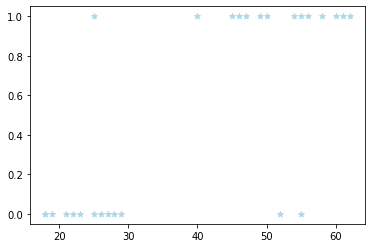

In [7]:
from matplotlib import pyplot as plt
plt.scatter(dataset.age, dataset.bought_insurance, marker= '*', color='lightblue')

The markers on 0.0 value on y axis shows the age of people who didn't buy the insurance and on 1.0 value on y axis shows the age of people who bought the insurence

I will split our dataset for training and testing purpose.

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(dataset[['age']], dataset.bought_insurance, random_state=20, test_size=0.3)

Let's import the classifier and train our model.

In [18]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Let's check the accuracy of the model

In [19]:
model.score(x_test, y_test)

1.0

We are getting accuracy of 1.0 because of low dataset, now I will predict the model but before that let's see the test data.  

In [21]:
x_test[:10]

,age
13,29
4,46
1,25
10,18
26,23
12,27
18,19
25,54
23,45


In [20]:
model.predict(x_test[:10])

array([0, 1, 0, 0, 0, 0, 0, 1, 1])

You can observe that our model is predicting correct value as higher aged person tends to buy the insurance and low aged person don't.
Let's check the probability also of buying an insurance and not buying the insurance.

In [22]:
model.predict_proba(x_test)

array([[0.70120346, 0.29879654],
       [0.30192858, 0.69807142],
       [0.77746542, 0.22253458],
       [0.87515403, 0.12484597],
       [0.80998572, 0.19001428],
       [0.74115799, 0.25884201],
       [0.86387315, 0.13612685],
       [0.16328672, 0.83671328],
       [0.3232993 , 0.6767007 ]])

Let's understand above output with first row as an example now,
[0.70120346, 0.29879654] means that there are 70% probability that he will not buy the insurance and 29% is the probability that he will buy the insurance.